In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Strategy for one stock portfolio

In [2]:
from TechnicalIndicators import *
from datetime import datetime as dt
import random 

random.seed(1)

In [3]:
import os
path = "tickers"  
files= os.listdir(path)  
s = []
for file in files: 
    #print(file)
    if '.csv' in file:
        stoc = pd.read_csv("tickers/" + file, sep = ",")
        print(file,  '  ',   stoc['date'][0], '  ', stoc['date'][len(stoc['date'])-1])
        s.append(file)

7012 JT.csv    2013-01-04    2021-03-19
9434 JT.csv    2020-10-02    2021-03-19
4902 JT.csv    2013-01-04    2021-03-19
5541 JT.csv    2013-01-04    2021-03-19
8604 JT.csv    2013-01-04    2021-03-19
9984 JT.csv    2013-01-04    2021-03-19
1332 JT.csv    2013-01-04    2021-03-19
8035 JT.csv    2013-01-04    2021-03-19
3086 JT.csv    2013-01-04    2021-03-19
3407 JT.csv    2013-01-04    2021-03-19
7004 JT.csv    2013-01-04    2021-03-19
8253 JT.csv    2013-01-04    2021-03-19
5706 JT.csv    2013-01-04    2021-03-19
2768 JT.csv    2013-01-04    2021-03-19
3865 JT.csv    2013-01-04    2017-09-29
9301 JT.csv    2013-01-04    2021-03-19
8002 JT.csv    2013-01-04    2021-03-19
5413 JT.csv    2013-01-04    2018-12-25
4004 JT.csv    2013-01-04    2021-03-19
6902 JT.csv    2013-01-04    2021-03-19
6954 JT.csv    2013-01-04    2021-03-19
7203 JT.csv    2013-01-04    2021-03-19
6767 JT.csv    2013-01-04    2017-01-23
1812 JT.csv    2013-01-04    2021-03-19
6366 JT.csv    2013-01-04    2019-07-31


In [4]:
len(s),s[:10]

(248,
 ['7012 JT.csv',
  '9434 JT.csv',
  '4902 JT.csv',
  '5541 JT.csv',
  '8604 JT.csv',
  '9984 JT.csv',
  '1332 JT.csv',
  '8035 JT.csv',
  '3086 JT.csv',
  '3407 JT.csv'])

### Time period, 11/06/2015 -- 01/12/2020

In [5]:
# backtesting parameters

days = 2000
end = dt(2020, 12, 1, 0, 0)
start = end - pd.Timedelta(days=days)
start

datetime.datetime(2015, 6, 11, 0, 0)

#### 10 assets in a portfolio

In [6]:
# portfolio of stocks -- randomly select

random.seed(2)

portfolio_stocks = []
asset_num = 10

indices = np.arange(len(s)) #0-247
np.random.shuffle(indices)

for i in indices[:asset_num]:
    portfolio_stocks.append(s[i])
    
print(portfolio_stocks)   

['9005 JT.csv', '2269 JT.csv', '8697 JT.csv', '9202 JT.csv', '4061 JT.csv', '6752 JT.csv', '2002 JT.csv', '4689 JT.csv', '4452 JT.csv', '8233 JT.csv']


In [7]:
# defining a data frame to store portfolio returns
portfolio_strategy_returns = pd.DataFrame()
portfolio_daily_returns = pd.DataFrame()

# buy and hold returns for individual stocs
bnh_stock_returns = []
bnh_stock_sharpe = []

#### Strategy 1

In [8]:
def strategy1(data,ma1,ma2): 
    
    data["daily_returns"] = np.log(data["last"]/data["last"].shift())
    
    # calculating moving averages
    data['ma_short'] = data['last'].ewm(span=ma1).mean().shift()
    data['ma_long'] = data['last'].ewm(span=ma2).mean().shift()

    # creating positions
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)    
    data["strategy_returns"] = data["daily_returns"] * data["position"]
    
    return data["strategy_returns"]

#### Strategy 2

In [ ]:
def strategy2(data):
    
    data = bollinger_bands(data, moving_average, 20)  # 20 days
    data['daily_returns'] = np.log(data['last']/data['last'].shift(1))
    # BUY condition
    data['signal'] = np.where((data['last'] < data['lower_band']) &
                            (data['last'].shift(1) >= data['lower_band']),1,0)

    # SELL condition
    data['signal'] = np.where( (data['last'] > data['upper_band']) &
                              (data['last'].shift(1) <= data['upper_band']),-1,data['signal'])
    # creating long and short positions 
    data['position'] = data['signal'].replace(to_replace=0, method='ffill')

    # shifting by 1, to account of close price return calculations
    data['position'] = data['position'].shift(1)

    # calculating stretegy returns
    data['strategy_returns'] = data['daily_returns'] * (data['position'])
    
    return data["strategy_returns"]

## iterating over stocks in the portfolio

In [10]:
for stock in portfolio_stocks:
    data = pd.read_csv("tickers/" + stock, sep = ",")

    portfolio_strategy_returns[stock] = strategy1 (data, ma1 = 3, ma2 = 8)   #strategy 1
    #portfolio_strategy_returns[stock] = strategy2(data)   #strategy 2
    
    bnh_stock_returns.append(list(data["strategy_returns"].cumsum())[-1])
    bnh_stock_sharpe.append(252**(1/2) * (data["strategy_returns"].mean() / data["strategy_returns"].std()))

In [11]:
print("\nSTRATEGY RETURNS ON PORTFOLIO")
portfolio_strategy_returns["Portfolio_rets"] = portfolio_strategy_returns.mean(axis=1)
portfolio_strategy_returns.round(decimals = 4).head(10)


STRATEGY RETURNS ON PORTFOLIO


,9005 JT.csv,2269 JT.csv,8697 JT.csv,9202 JT.csv,4061 JT.csv,6752 JT.csv,2002 JT.csv,4689 JT.csv,4452 JT.csv,8233 JT.csv,Portfolio_rets
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000
2,0.0000,0.0039,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0014,0.0034,0.0000,0.0009
3,0.0020,-0.0026,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0073,0.0009,0.0081,0.0001
4,0.0020,0.0052,0.0000,0.0000,0.0033,0.0000,-0.0000,0.0000,0.0085,0.0032,0.0022
5,0.0020,0.0077,-0.0204,0.0000,0.0131,0.0000,0.0000,0.0000,0.0072,0.0096,0.0019
6,0.0161,0.0090,-0.0060,0.0054,0.0032,0.0269,0.0000,0.0345,0.0084,0.0392,0.0137
7,-0.0060,-0.0064,-0.0000,-0.0163,-0.0130,-0.0071,0.0018,-0.0144,-0.0008,-0.0155,-0.0078
8,-0.0040,0.0000,0.0000,-0.0000,0.0065,0.0036,-0.0036,0.0455,0.0137,0.0031,0.0065
9,0.0180,0.0089,0.0000,-0.0000,0.0257,0.0518,0.0172,-0.0081,0.0095,0.0426,0.0166


In [12]:
perf = pd.DataFrame(index=portfolio_stocks,columns=["Cumulative returns","Annualized Sharpe Ratio"])

for i,stock in enumerate(portfolio_stocks):
    cum_ret = bnh_stock_returns[i]
    anu_shp = bnh_stock_sharpe[i]
    perf.loc[stock] = [cum_ret,anu_shp]
    
perf

,Cumulative returns,Annualized Sharpe Ratio
9005 JT.csv,0.500988,0.364727
2269 JT.csv,0.862396,0.551225
8697 JT.csv,0.183072,1.693172
9202 JT.csv,0.321177,0.228885
4061 JT.csv,0.861668,0.498801
6752 JT.csv,1.371301,0.744597
2002 JT.csv,-0.131862,-0.087699
4689 JT.csv,1.004482,0.483747
4452 JT.csv,-0.105159,-0.071357
8233 JT.csv,0.283606,0.166844


In [13]:
perf.mean()

Cumulative returns         0.515167
Annualized Sharpe Ratio    0.457294
dtype: float64

In [14]:
print("Cumulative returns MA Stretegy                  :", list(portfolio_strategy_returns["Portfolio_rets"].cumsum())[-1])
print("Annualized sharpe ratio MA Strategy             :", 252**(1/2) * (portfolio_strategy_returns["Portfolio_rets"].mean() / portfolio_strategy_returns["Portfolio_rets"].std()))   
print("\n")

Cumulative returns MA Stretegy                  : 0.5409780549612561
Annualized sharpe ratio MA Strategy             : 0.6334497061460501




## Plotting

<Axes: title={'center': 'MOVING AVERAGES STRATEGY CUMULATIVE RETURNS'}>

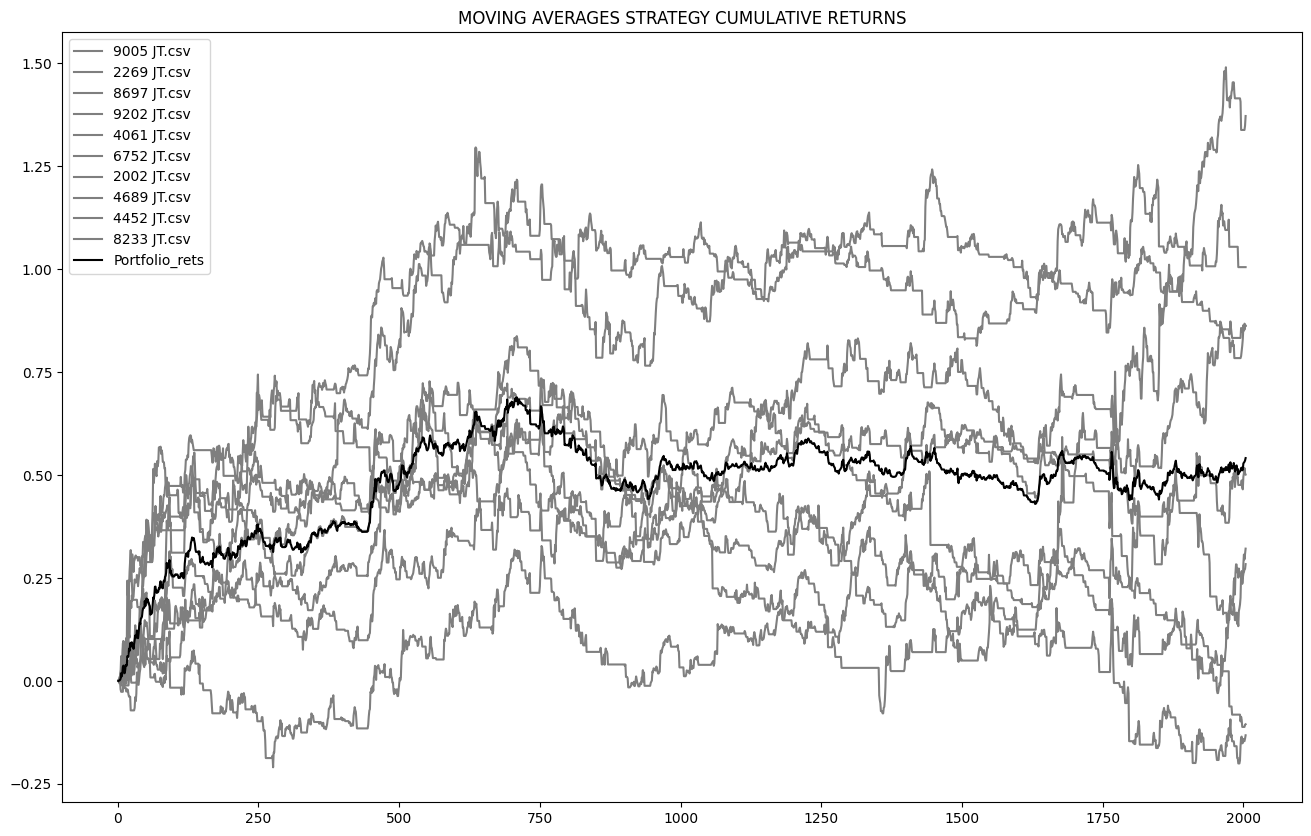

In [15]:
colors = ['tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray',"k"]
portfolio_strategy_returns.cumsum().plot(figsize=(16,10), title="MOVING AVERAGES STRATEGY CUMULATIVE RETURNS", color=colors)